In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
gcamp7_lib = pd.read_csv('./gcamp7_lib.csv', index_col = 0)
gcamp6_lib = pd.read_csv('./GCaMP6_lib.csv', index_col = 0)

In [3]:
# Generate dataframe of type of mutation by residue number
AA1idx = [
    'A',
    'V',
    'L',
    'I',
    'M',
    'F',
    'Y',
    'W',
    'S',
    'T',
    'N',
    'Q',
    'C',
    'D',
    'E',
    'H',
    'K',
    'R',
    'G',
    'P',
    '*'
]

gcamp3_seq = 'MGSHHHHHHGMASMTGGQQMGRDLYDDDDKDLATMVDSSRRKWNKTGHAVRAIGRLSSLENVYIKADKQKNGIKANFKIRHNIEDGGVQLAYHYQQNTPIGDGPVLLPDNHYLSVQSKLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYIQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNTRDQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGDGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK*'
gcamp6s_seq = 'MGSHHHHHHGMASMTGGQQMGRDLYDDDDKDLATMVDSSRRKWNKTGHAVRAIGRLSSLENVYIKADKQKNGIKANFKHRHNIEDGGVQLAYHYQQNTPIGDGPVLLPDNHYLSVQSKLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYIQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNTLPQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGDGTIDFPEFLTMMARKMKDYRSTEEIREAFRGFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK*'
# index = sequence number - 1
"""
Used to get GCaMP6s sequence

gcamp6s_seq = list(gcamp3_seq)
for mut in gcamp6_lib.loc['GCaMP6s', 'Mutations added to GCaMP3'].split(' '):
    idx = int(mut[1:-1])
    gcamp6s_seq[idx] = mut[-1]
gcamp6s_seq = ''.join(gcamp6s_seq)
"""


"\nUsed to get GCaMP6s sequence\n\ngcamp6s_seq = list(gcamp3_seq)\nfor mut in gcamp6_lib.loc['GCaMP6s', 'Mutations added to GCaMP3'].split(' '):\n    idx = int(mut[1:-1])\n    gcamp6s_seq[idx] = mut[-1]\ngcamp6s_seq = ''.join(gcamp6s_seq)\n"

In [4]:
# Get point mutants from GCaMP7 data
pointMuts = []
for mut in gcamp7_lib.index.tolist():
    if mut != 'GCaMP6s':
        mutations = gcamp7_lib.loc[mut, 'Mutations added to GCaMP6s'].split(' ')
        if len(mutations) == 1:
            pointMuts.append(mut)
pointMuts = gcamp7_lib.loc[pointMuts]

# There are insertions in this dataset, first check in this dataframe, and then check the rest of the dataset
insertions = []
for mut in pointMuts.index.tolist():
    mutation = gcamp7_lib.loc[mut, 'Mutations added to GCaMP6s']
    if 'ins' in mutation:
        insertions.append(mut)
pointMuts.drop(insertions, axis = 0, inplace = True) # There was only one insertion here, so 79 point mutants total

# Check for insertions in whole GCaMP7 library
insertions = []
for mut in gcamp7_lib.index.tolist():
    if mut != 'GCaMP6s':
        mutation = gcamp7_lib.loc[mut, 'Mutations added to GCaMP6s']
        if 'ins' in mutation:
            insertions.append(mut)
# The only insertion is 10.1082, I'm going to drop this one since I don't know how to deal with this point and there's only one
gcamp7_lib.drop(insertions, axis = 0, inplace = True)
#gcamp7_lib.to_csv('./gcamp7_lib.csv')
# I updated the master gcamp7_lib.csv to not include this insertion

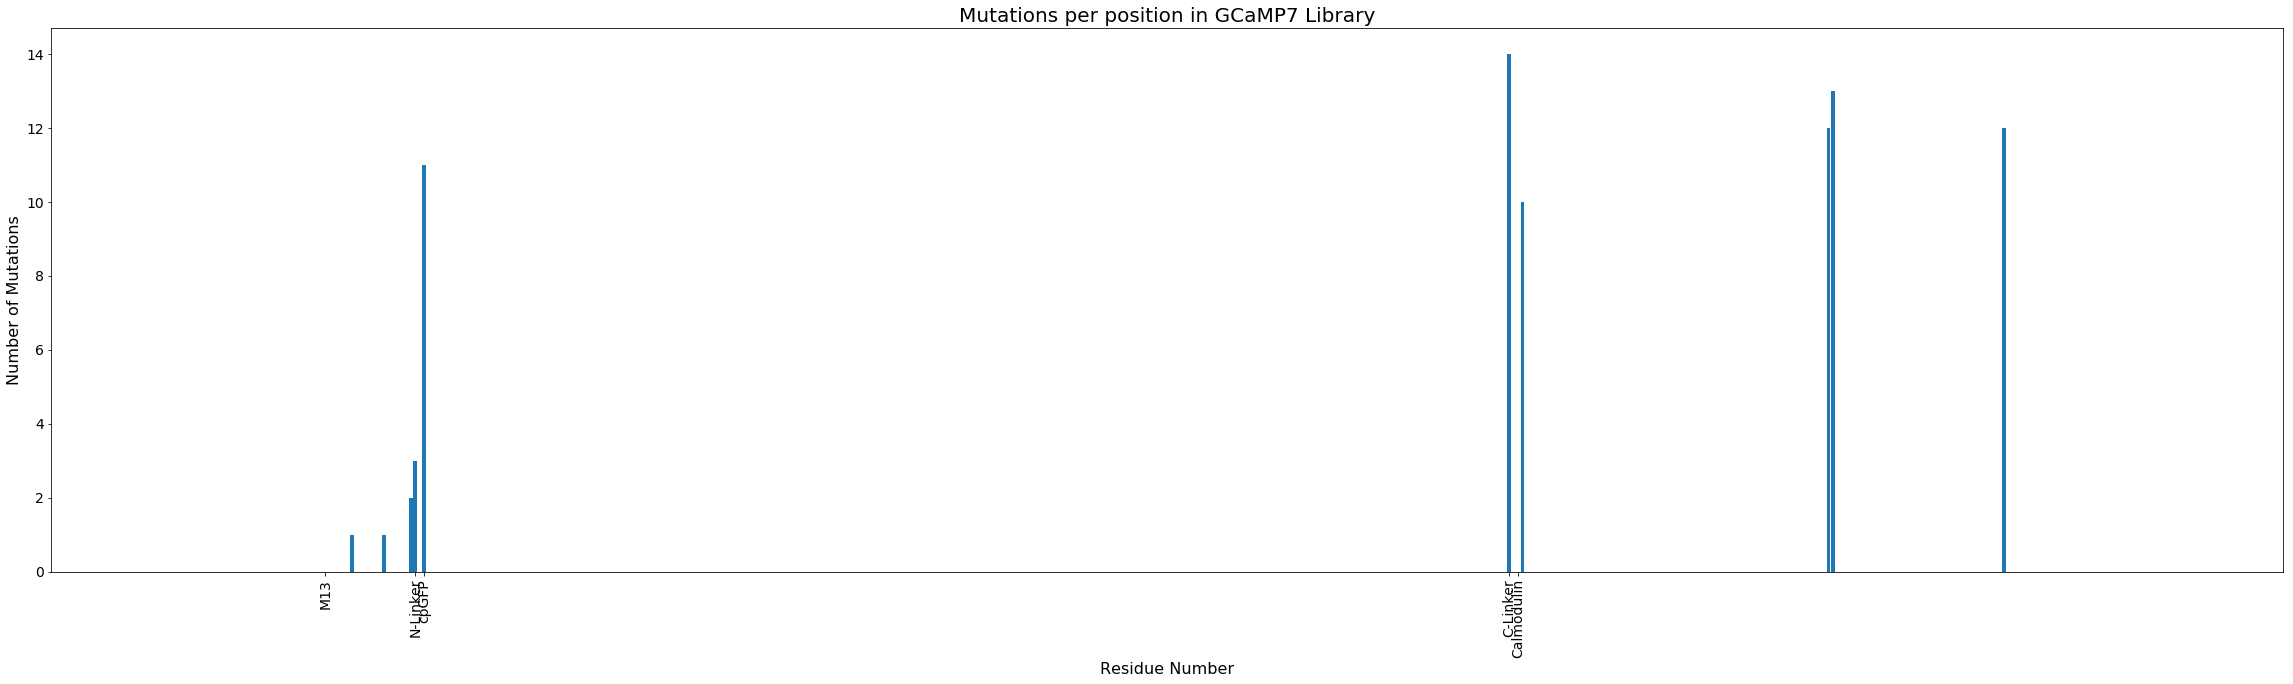

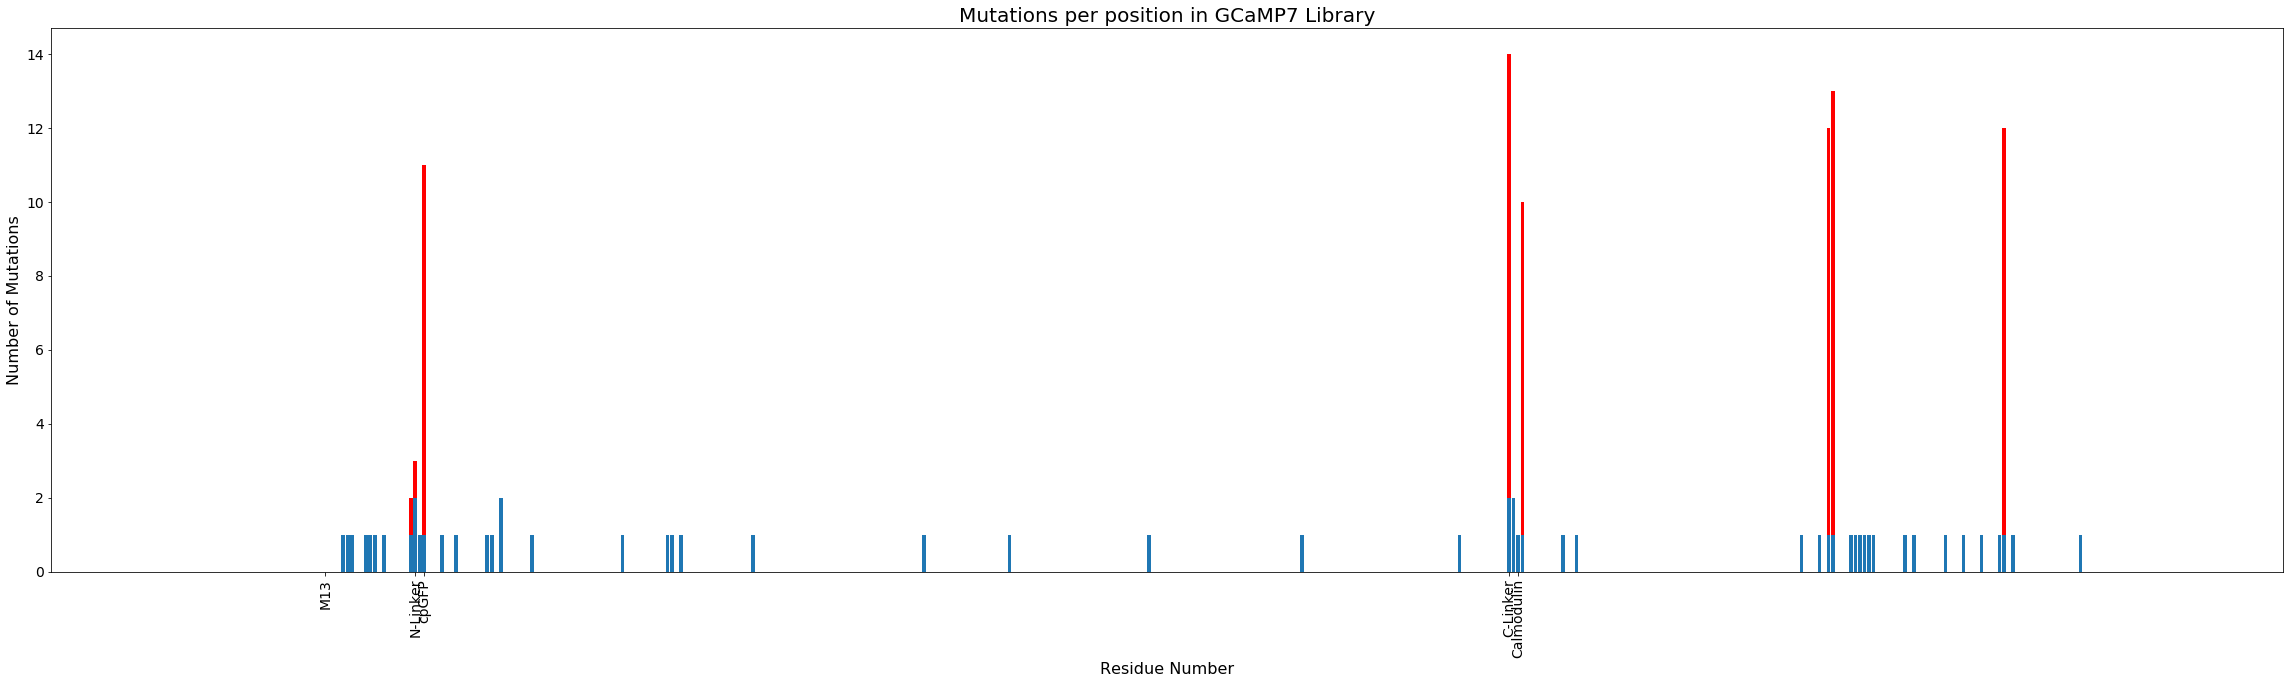

In [12]:
AA1idx = [
    'A',
    'V',
    'L',
    'I',
    'M',
    'F',
    'Y',
    'W',
    'S',
    'T',
    'N',
    'Q',
    'C',
    'D',
    'E',
    'H',
    'K',
    'R',
    'G',
    'P',
    '*'
]
pmMap = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in pointMuts.index.tolist():
    muts = pointMuts.loc[var, 'Mutations added to GCaMP6s']
    resn = int(muts[1:-1])
    mut = muts[-1]
    pmMap.loc[mut, resn] = 1
    
plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP7 Library', fontsize = 20)
plt.show()

    
fullMap = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in gcamp7_lib.index.tolist():
    if var != 'GCaMP6s':
        muts = gcamp7_lib.loc[var, 'Mutations added to GCaMP6s'].split(' ')
        for mut in muts:
            resn = int(mut[1:-1])
            res = mut[:-1]
            fullMap.loc[res, resn] = 1  

plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap.fillna(0.0).sum(axis = 0), color = 'r')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP7 Library', fontsize = 20)
plt.show()



In [22]:
# Make the same kind of plot for GCaMP6 dataset
# Save original pointMuts and fullMap DF to new variables
pointMuts7 = pointMuts.copy()
fullMap7 = fullMap.copy()

pointMuts6 = []
for mut in gcamp6_lib.index.tolist()[2:]:
    mutations = gcamp6_lib.loc[mut, 'Mutations added to GCaMP3'].split(' ')
    if len(mutations) == 1:
        pointMuts6.append(mut)
pointMuts6 = gcamp6_lib.loc[pointMuts6]


fullMap6 = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in gcamp6_lib.index.tolist()[2:]:
    muts = gcamp6_lib.loc[var, 'Mutations added to GCaMP3'].split(' ')
    for mut in muts:
        resn = int(mut[1:-1])
        res = mut[:-1]
        fullMap6.loc[res, resn] = 1

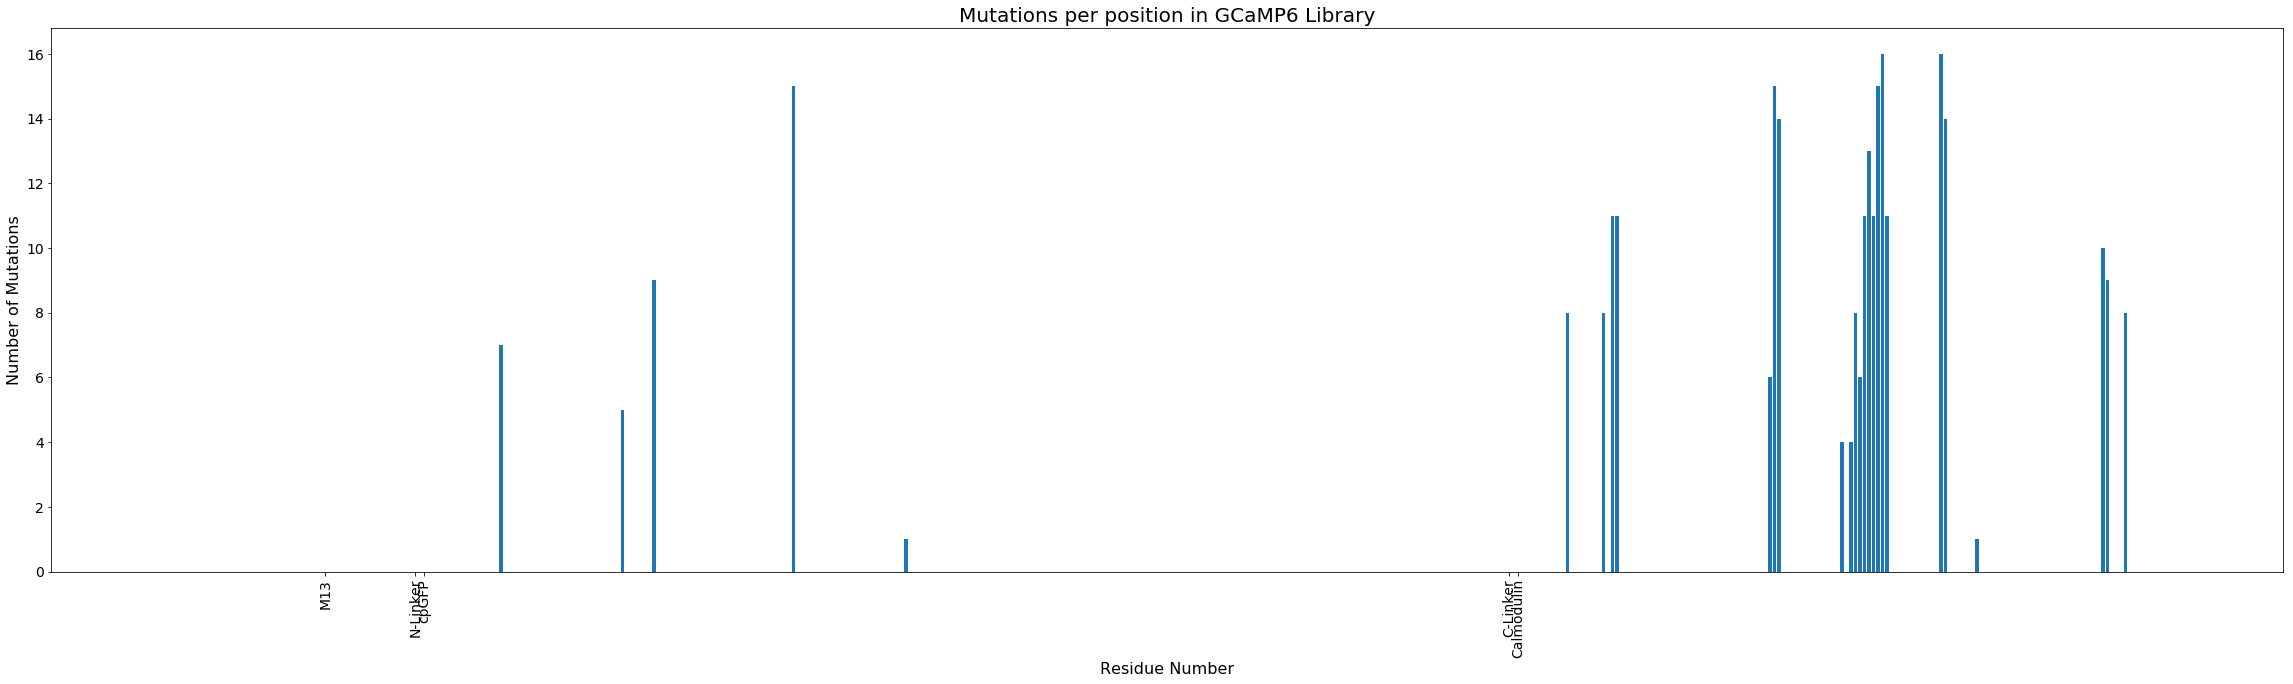

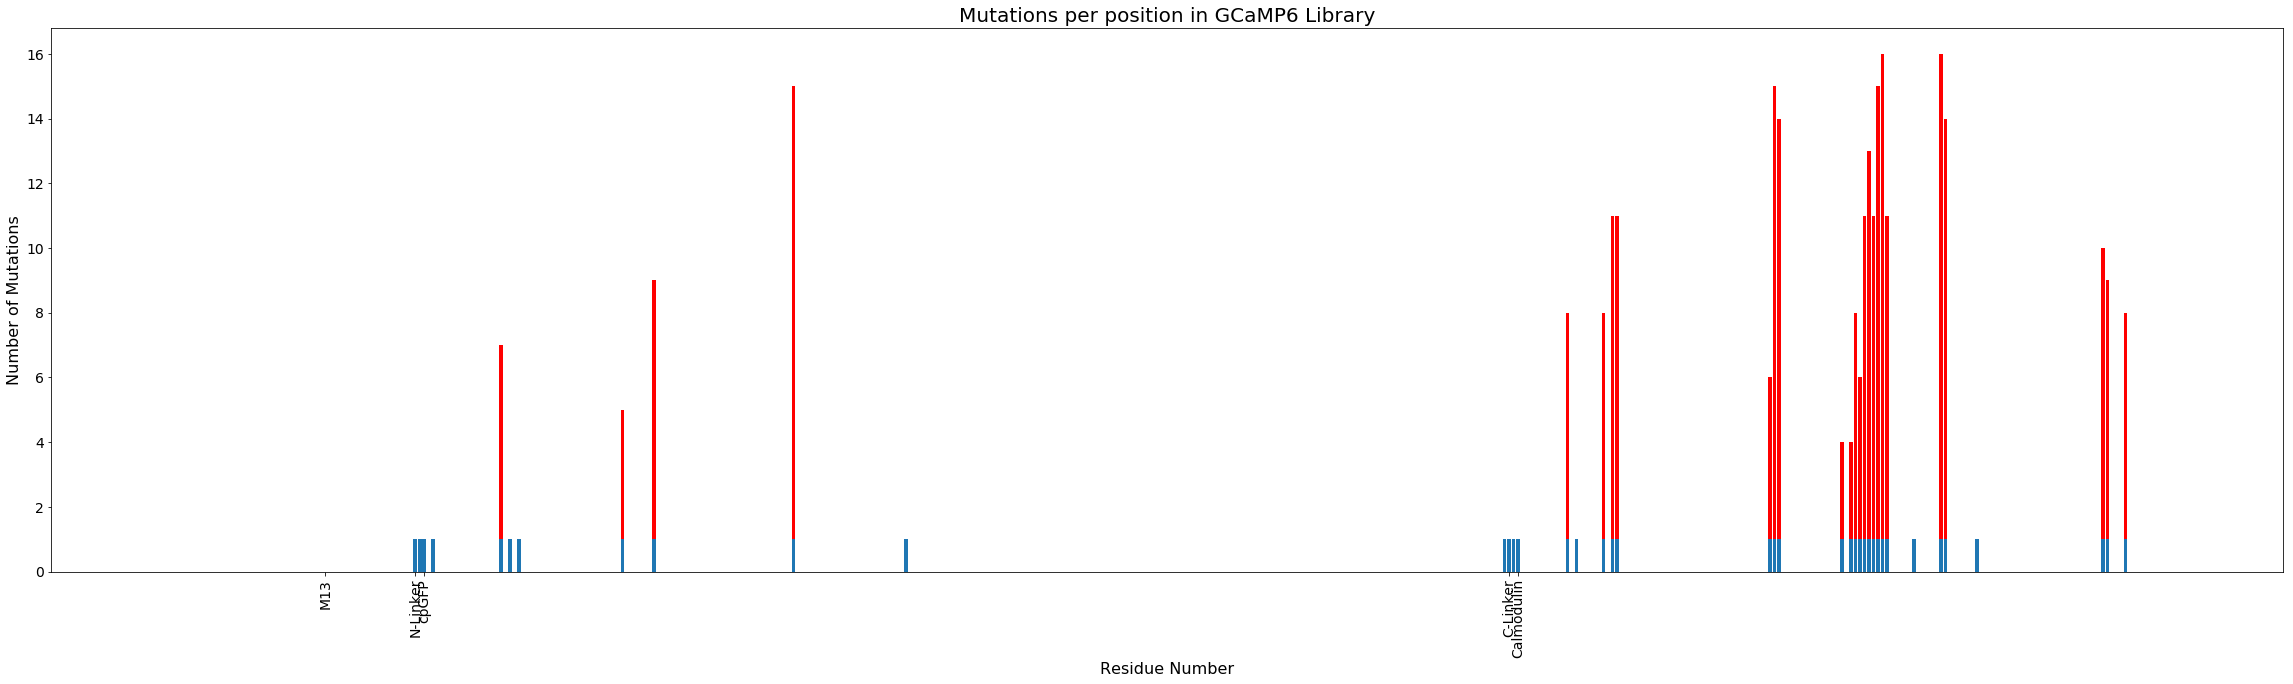

In [32]:
pmMap7 = pmMap.copy()

pmMap6 = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in pointMuts6.index.tolist():
    muts = pointMuts6.loc[var, 'Mutations added to GCaMP3']
    resn = int(muts[1:-1])
    mut = muts[-1]
    pmMap6.loc[mut, resn] = 1

plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP6 Library', fontsize = 20)
plt.show()


plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0), color = 'r')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap6.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP6 Library', fontsize = 20)
plt.show()

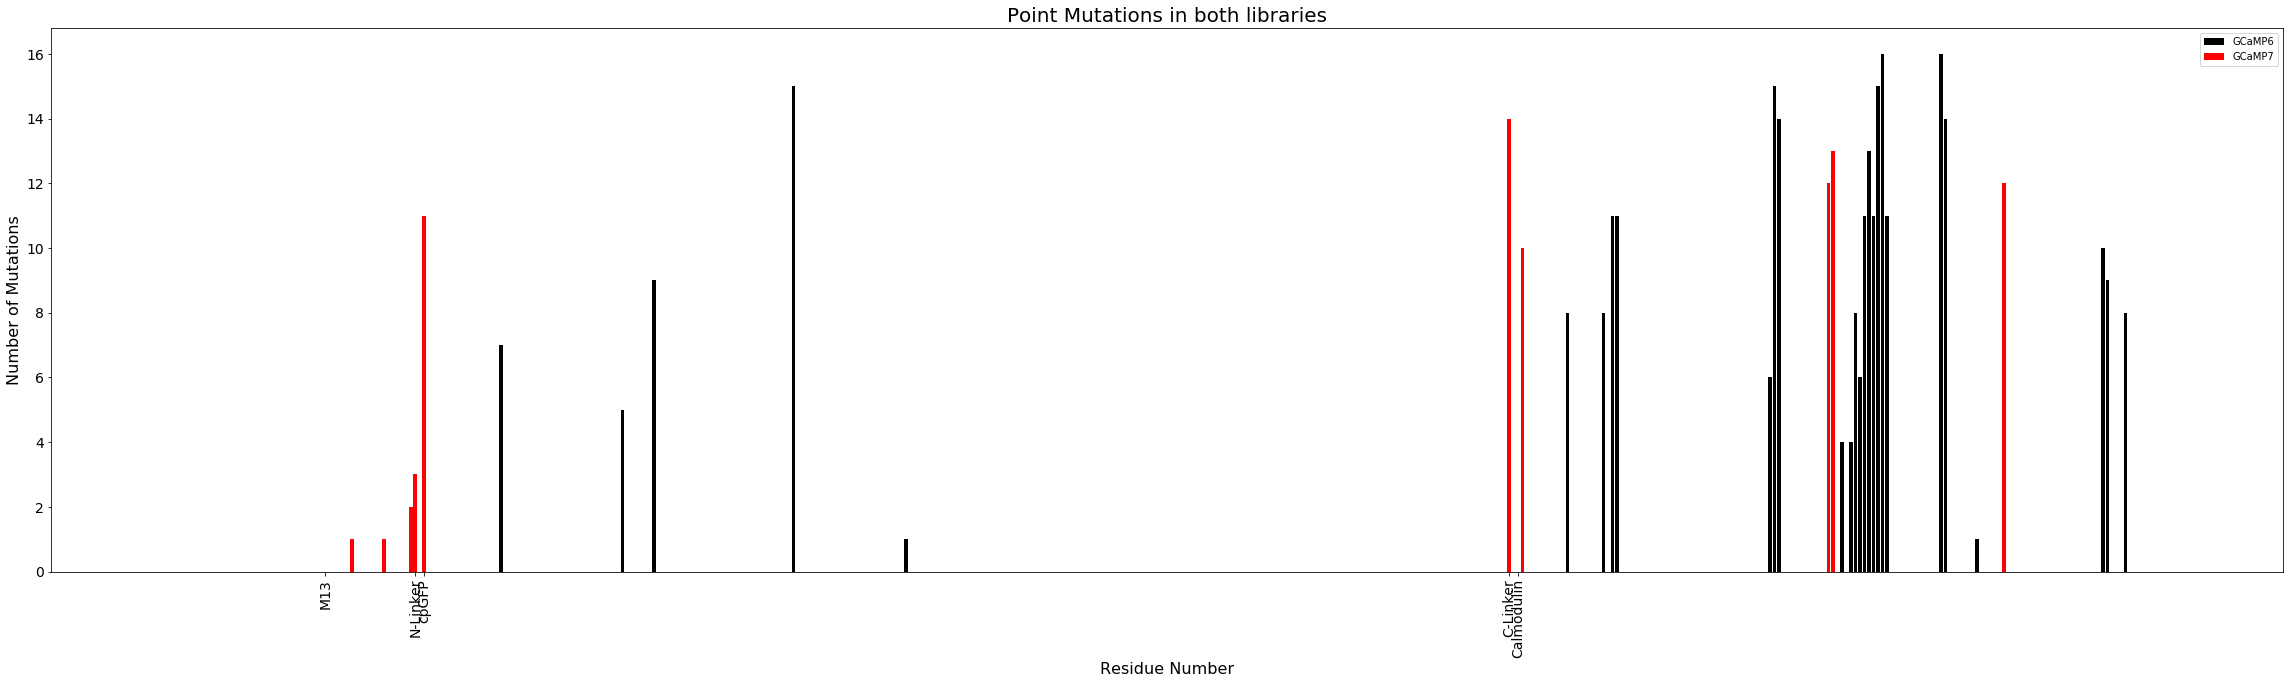

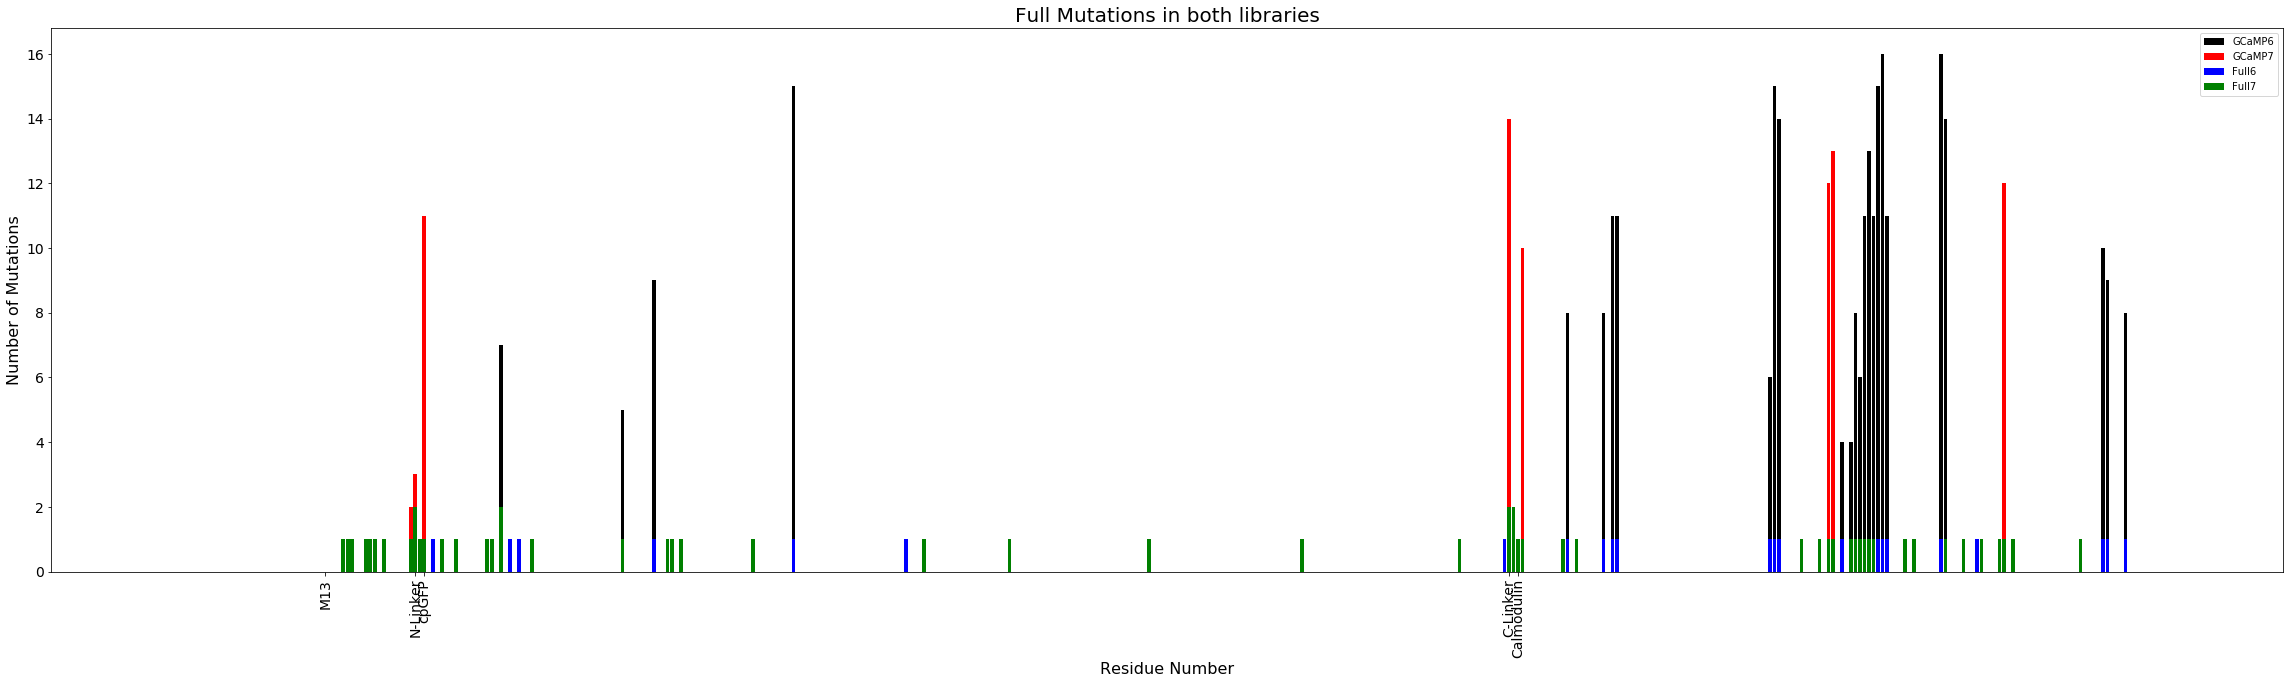

In [31]:
# Plot all mutations from both libraries on top of each other
plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0), color = 'k')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap7.fillna(0.0).sum(axis = 0), color = 'r')
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Point Mutations in both libraries', fontsize = 20)
plt.legend(['GCaMP6', 'GCaMP7'])
plt.show()

plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0), color = 'k')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap7.fillna(0.0).sum(axis = 0), color = 'r')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap6.fillna(0.0).sum(axis = 0), color = 'b')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap7.fillna(0.0).sum(axis = 0), color = 'g')
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Full Mutations in both libraries', fontsize = 20)
plt.legend(['GCaMP6', 'GCaMP7', 'Full6', 'Full7'])
plt.show()


In [33]:
z_scales = pd.read_csv('./Z-scales.csv', index_col = 0)
z_scales

,Z1,Z2,Z3
Amino Acid,,,
A,0.07,-1.73,0.09
V,-2.69,-2.53,-1.29
L,-4.19,-1.03,-0.98
I,-4.44,-1.68,-1.03
P,-1.22,0.88,2.23
F,-4.92,1.30,0.45
W,-4.75,3.65,0.85
M,-2.49,-0.27,-0.41
K,2.84,1.41,-3.14


In [39]:
# Make gcamp7 dataset for regression models
# Build matrix for a single sample
varArrDF = pd.DataFrame(index = gcamp7_lib.index.tolist(), columns = range(1350))

for variant in gcamp7_lib.index.tolist():
    if variant == 'GCaMP6s': 
        continue
        
    # Parse out mutations for this variant
    mutations = gcamp7_lib.loc[variant, 'Mutations added to GCaMP6s'].split(' ')
    varSeq = list(gcamp3_seq)

    # Mutate sequence accordingly
    for mutation in mutations:
        seqn = int(mutation[1:-1])
        varSeq[seqn - 1] = mutation[-1]

    # Make a DF with Z-scales according to each residue, and flatten into a 1D array
    varDF = pd.DataFrame(index = range(len(varSeq)), columns = ['Seq', 'Z1', 'Z2', 'Z3'])
    varDF['Seq'] = varSeq
    varDF = varDF[:-1]
    for pos in varDF.index:
        resID = varDF.loc[pos, 'Seq']
        varDF.loc[pos, ['Z1', 'Z2', 'Z3']] = z_scales.loc[resID]
    varArr = varDF[['Z1', 'Z2', 'Z3']].values.flatten()

    # Assign variant array to master DF
    varArrDF.loc[variant] = varArr

In [41]:
# Add GCaMP6s values to master
varSeq = list(gcamp6s_seq)
varDF = pd.DataFrame(index = range(len(varSeq)), columns = ['Seq', 'Z1', 'Z2', 'Z3'])
varDF['Seq'] = varSeq
varDF = varDF[:-1]
for pos in varDF.index:
    resID = varDF.loc[pos, 'Seq']
    varDF.loc[pos, ['Z1', 'Z2', 'Z3']] = z_scales.loc[resID]
varArr = varDF[['Z1', 'Z2', 'Z3']].values.flatten()
varArrDF.loc['GCaMP6s'] = varArr

In [43]:
varArrDF.to_csv('./varZScore3_gcamp7.csv')

In [44]:
# Drop positions that do not mutate
colsToDrop = varArrDF.nunique()[varArrDF.nunique() == 1].index
dat = varArrDF.drop(colsToDrop, axis = 1)
dat

,126,127,128,129,130,131,132,133,134,141,...,1232,1233,1234,1235,1239,1240,1241,1284,1285,1286
GCaMP3,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
GCaMP5G,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
GCaMP6s,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
GCaMP6f,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
10.699,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
10.700,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
10.701,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
G-GECO1.0,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,-2.69,-2.53,-1.29
G-GECO1.1,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,-2.69,-2.53,-1.29
GEX-GECO1,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,-2.69,-2.53,-1.29


In [55]:
x = dat
y = gcamp7_lib['160 AP _F/F0']

In [69]:
# Choose different CV method (ridge regressor, SVR, random forest)
from sklearn.model_selection import ShuffleSplit
splits = 10
ss = ShuffleSplit(n_splits = splits, test_size = 0.2)
ss.get_n_splits(x)

from sklearn.linear_model import LinearRegression #0
from sklearn.linear_model import SGDRegressor     #1
from sklearn.linear_model import Lasso            #2
from sklearn.linear_model import ElasticNet       #3
from sklearn.linear_model import Ridge            #4
from sklearn.svm import SVR                       #5
from sklearn.ensemble import RandomForestRegressor#6
from sklearn.ensemble import AdaBoostRegressor    #7
from sklearn.ensemble import GradientBoostingRegressor #8

#ss = ShuffleSplit(n_splits = 100, test_size = 0.2)
#ss.get_n_splits(x)


scores = [0] * 9

models = [
    LinearRegression(),
    SGDRegressor(),
    Lasso(),
    ElasticNet(),
    Ridge(),
    SVR(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]


In [80]:
i = 0
for mdl in models:
    for train_index, test_index in ss.split(x):
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        #mdl = models[i]
        mdl.fit(x_train, y_train)
        y_pred = mdl.predict(x_test)
        scores[i] = scores[i] + mdl.score(x_test, y_test)
    i += 1

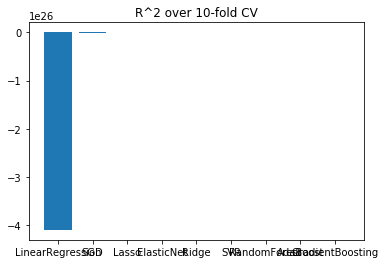

In [84]:
scores = [score * 1.0 / 1.0 * splits for score in scores]
plt.bar(range(1, 10), scores)
plt.xticks(range(1, 10), ['LinearRegression', 'SGD', 'Lasso', 'ElasticNet', 'Ridge', 'SVR', 'RandomForest', 'AdaBoost', 'GradientBoosting'])
plt.title('R^2 over 10-fold CV')
plt.show()

In [85]:
ridgeScores = []
svrScores = []
rfScores = []
adaScores = []
gradScores = []

splits = 100
ss = ShuffleSplit(n_splits = splits, test_size = 0.2)
ss.get_n_splits(x)

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = Ridge()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    ridgeScores.append(mdl.score(x_test, y_test))
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.svm.SVR()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    svrScores.append(mdl.score(x_test, y_test))
    
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = RandomForestRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    rfScores.append(mdl.score(x_test, y_test))

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.ensemble.AdaBoostRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    adaScores.append(mdl.score(x_test, y_test))

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.ensemble.GradientBoostingRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    gradScores.append(mdl.score(x_test, y_test))

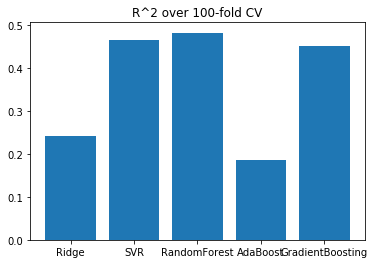

In [86]:
plt.bar([1, 2, 3, 4, 5],[np.mean(ridgeScores), np.mean(svrScores), np.mean(rfScores), np.mean(adaScores), np.mean(gradScores)])
plt.xticks([1, 2, 3, 4, 5], ['Ridge', 'SVR', 'RandomForest', 'AdaBoost', 'GradientBoosting'])
plt.title('R^2 over 100-fold CV')
plt.show()